In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

#Load Dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Cleanup Data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
#Filter data that only include salary values from Thailand
df_TH = df[df['job_country'] == 'Thailand'].dropna(subset=['salary_year_avg']).copy()

#create a list of the main jobs
job_titles = df_TH['job_title_short'].value_counts().index[:6].tolist()

#filter the df for the top 6 job titles
df_TH_top6 = df_TH[df_TH['job_title_short'].isin(job_titles)]

#order by median salary
job_order = df_TH_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

job_titles

['Data Analyst',
 'Machine Learning Engineer',
 'Data Scientist',
 'Senior Data Analyst',
 'Data Engineer',
 'Business Analyst']

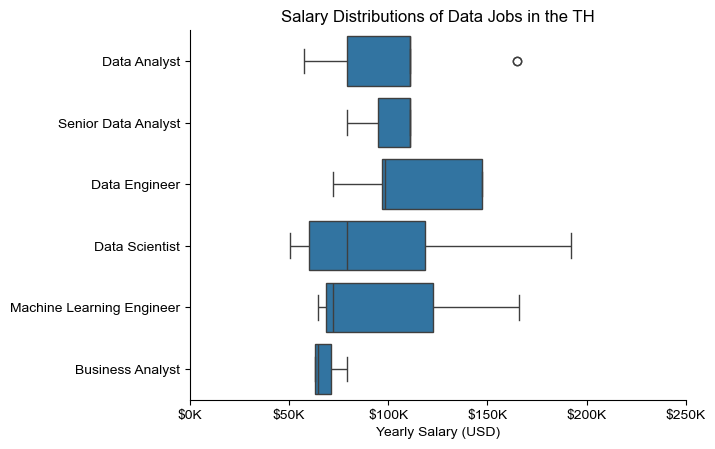

In [3]:
sns.boxplot(data=df_TH_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
sns.despine()

# this is all the same
plt.title('Salary Distributions of Data Jobs in the TH')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 250000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [4]:
#Investigate median salary and skills for data analyst in  Thailand
df_DA_TH = df[(df['job_country'] == 'Thailand') & (df['job_title_short'] == 'Data Analyst')].copy()
df_DA_TH = df_DA_TH.dropna(subset=['salary_year_avg'])
df_DA_TH = df_DA_TH.explode('job_skills')
df_DA_TH[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
48875,98500.0,sql
48875,98500.0,sas
48875,98500.0,sas
48875,98500.0,r
48875,98500.0,python


In [5]:
#hishest paid and most demanded skills
df_DA_top_pay = df_DA_TH.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
spark,1,165000.0
git,1,165000.0
golang,1,165000.0
hadoop,1,165000.0
snowflake,1,165000.0
kafka,2,165000.0
redshift,1,165000.0
gcp,1,165000.0
scala,2,138087.5


In [6]:
df_DA_skills = df_DA_TH.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10)

df_DA_skills

,count,median
job_skills,,
sql,10,111175.0
tableau,8,111175.0
power bi,7,111175.0
r,6,104837.5
python,6,111175.0
sql server,5,111175.0
excel,5,111175.0
sas,4,88850.0
pandas,3,111175.0


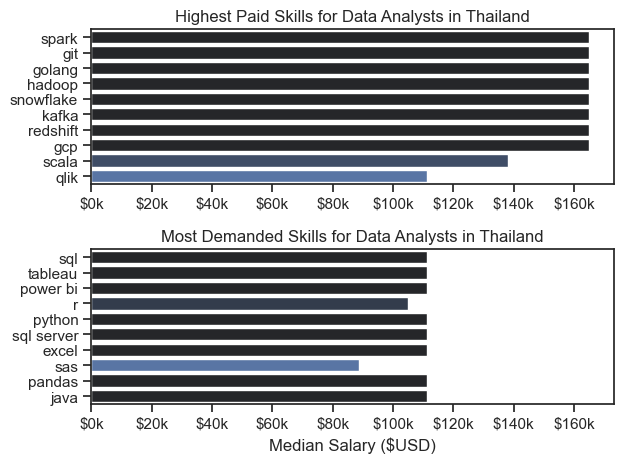

In [7]:
#plot 2 horizontal bar chart
fig, ax = plt.subplots(2, 1)

#Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y='job_skills', hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
ax[0].set_title('Highest Paid Skills for Data Analysts in Thailand')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))

#Top 10 Most Demanded Skills for Data Analysts
sns.barplot(data=df_DA_skills, x='median', y='job_skills', hue='median', ax=ax[1], palette='dark:b_r')
ax[1].legend().remove()
ax[1].set_title('Most Demanded Skills for Data Analysts in Thailand')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()